In [1]:
file = '/home/berceanu/Development/pic/ming_jobs/ep_III3D1/3dinput.deck'

In [2]:
# !cat /home/berceanu/Development/pic/ming_jobs/ep_III3D1/3dinput.deck

In [3]:
from sympy import pi, sqrt, exp

In [4]:
from sympy.physics.units import Quantity
from sympy.physics.units.util import convert_to
from sympy.physics.units.dimensions import length, mass, frequency, time, charge, energy, mass, voltage, power
from sympy.physics.units.prefixes import pico, femto, micro, peta, tera, giga
from sympy.physics.units.definitions import meter, micrometer, centimeter, nanometer, hertz, joule, watt, second, coulomb, volt, farad, kilogram, radian
from sympy.physics.units.definitions import speed_of_light, electric_constant

In [80]:
# define fs, PHz
fs = femtosecond = femtoseconds = Quantity("femtosecond", time, femto*second, "fs")
ps = picosecond = picoseconds = Quantity("picosecond", time, pico*second, 'ps')
PHz = petahertz = petahertzs = Quantity("petahertz", frequency, peta*hertz)
THz = terahertz = terahertzs = Quantity("terahertz", frequency, tera*hertz)
TV = teravolt = teravolts = Quantity("teravolt", voltage, tera*volt)
TW = terawatt = terawatts = Quantity("terawatt", power, tera*watt)
GW = gigawatt = gigawatts = Quantity("gigawatt", power, giga*watt)

In [6]:
# define the elementary (electron) charge 
from scipy.constants import elementary_charge as ec
qe = elementary_charge = Quantity("elementary_charge", charge, ec*coulomb)

In [7]:
# define electron mass
from scipy.constants import electron_mass as em
me = electron_mass = Quantity("electron_mass", mass, em*kilogram)

In [8]:
# shorter names
c = speed_of_light
e0 = electric_constant

In [10]:
def critical(freq):
    """Returns critical density for a given frequency"""
    return (freq**2 * me * e0) / (qe**2)

In [19]:
rho_ele.n()

electron_rho

In [21]:
e0

vacuum_permittivity

In [26]:
rho_ele

electron_rho

In [46]:
rho_ele = Quantity("electron_rho", 1/length**3, 7.11e+18/centimeter**3)

In [47]:
convert_to(rho_ele, centimeter**3).n()

7.11e+18/centimeter**3

In [48]:
# plasma frequency
pl_freq = sqrt(rho_ele * (qe**2) / (me * e0))
convert_to(pl_freq, THz).n()

In [54]:
# plasma wavelength
pl_wavelength = 2 * pi * c/ pl_freq
convert_to(pl_wavelength, micrometer).n()

12.5220155933125*micrometer

In [57]:
# normalized vector potential
a0 = 3

In [70]:
# beam size
r0 = 2 * sqrt(pl_wavelength**2 / (4*pi**2) * a0**2 / sqrt(1 + a0**2))
convert_to(r0, micrometer).n()

6.724277415232*micrometer

In [71]:
# do we resolve plasma wavelength?
CELL_WIDTH_SI = Quantity(0.1772e-6, length, meter)


TypeError: name should be a string, not <class 'float'>

In [82]:
pd = Quantity('pulse_duration', time, 27 *fs)
convert_to(pd, second).n()

2.7e-14*second

In [84]:
d = 10 * c * pd
convert_to(d, micrometer).n()

80.94396366*micrometer

In [88]:
2**12

4096

In [11]:
# define our own scale                    ^^^
l0 = Quantity("plasma_skin_depth", length, 5. * micrometer)
t0 = Quantity("plasma_time_unit", time, l0 / c)
w0 = Quantity("plasma_frequency", frequency, c / l0)
rho0 = Quantity("density_unit", 1/length**3, critical(w0))

In [12]:
print('plasma time unit = ',convert_to(t0, fs))
print('plasma frequency = ', convert_to(w0, THz))
print('plasma density = ', convert_to(rho0, centimeter**3).n())

plasma time unit =  16.6782047599076*femtosecond
plasma frequency =  59.9584916*terahertz
plasma density =  1.12958348939313e+18/centimeter**3


In [35]:
# laser parameters
# laser strength parameter
laser_a0 = 3.
laser_wavelength = l0 / 6.25
laser_omega = 2 * pi * c / laser_wavelength # ras/s
laser_frequency = laser_omega / (2*pi)
# waist at focus, r_0
laser_waist = 2. * sqrt(laser_a0) * l0 * 1.4
laser_duration = 2. * sqrt(laser_a0) * t0 * 0.4
# amplitude of the electric field
laser_amp = laser_a0 * laser_omega * (me * c / qe)
laser_intensity = (c * e0) / 2 * laser_amp**2
laser_power = laser_intensity * (pi * laser_waist**2 / 2)
laser_energy = laser_power * laser_duration

In [36]:
print('f = ', convert_to(laser_frequency, terahertz).n())
print('w_0 = ', convert_to(laser_waist, micrometer))
print('E_L = ', convert_to(laser_amp, teravolt/meter).n())
print('I = ', convert_to(laser_intensity, watt/centimeter**2).n())
print('P = ', convert_to(laser_power, terawatt).n())
print('tau_0 = ', convert_to(laser_duration, femtosecond))
print('E = ', convert_to(laser_energy, joule).n())
print('lambda = ', convert_to(laser_wavelength, nanometer))
print('a_0 = ', laser_a0)

f =  374.7405725*terahertz
w_0 =  24.2487113059643*micrometer
E_L =  12.0401290169219*teravolt/meter
I =  1.92398516344552e+19*watt/centimeter**2
P =  177.704703059829*terawatt
tau_0 =  23.1099984185576*femtosecond
E =  4.1067554066829*joule
lambda =  800.0*nanometer
a_0 =  3.0


In [ ]:
# time scales

In [66]:
time_end = 256 * t0 

In [103]:
print('simulation ends at ', convert_to(time_end, femtosecond))

simulation ends at  4269.62041853635*femtosecond


In [ ]:
#laser spatial profile

In [ ]:
def gauss(x, x0, w):
    r"""Gaussian profile in variable ``x`` centered on ``x0`` with a characteristic width ``w``."""
    expr = np.exp(-((x - x0)/w)**2)
    return expr

In [100]:
# laser temporal profile

In [101]:
# gaussian in time, centered at
convert_to(2.2 * laser_duration, femtosecond)

50.8419965208268*femtosecond

In [74]:
# laser end time
t_end = 6. * laser_duration 

In [105]:
# fwhm in y and z
convert_to(2 * np.sqrt(np.log(2)) * laser_waist, micrometer)

40.3767528248247*micrometer

In [102]:
fwhm = 2 * np.sqrt(np.log(2)) * laser_duration
print('lase full width at half maximum ', convert_to(fwhm, femtosecond))

lase full width at half maximum  38.4806714944345*femtosecond


In [76]:
print('laser ends at ', convert_to(t_end, femtosecond))

laser ends at  138.659990511346*femtosecond


In [ ]:
# laser spatial profile
profile = gauss(y, 0., laser_waist) * gauss(z, 0., laser_waist) * gauss(time, laser_duration * 2.2, laser_duration)


In [ ]:
# moving window

In [77]:
window_start_time = 12 * t0

In [78]:
print('window starts moving at ', convert_to(window_start_time, femtosecond))

window starts moving at  200.138457118891*femtosecond


In [80]:
# simulation file /home/berceanu/Development/pic/ming_jobs/ep_III3D1/0005.sdf is a snapshot taken at time
t_file = Quantity("sdf_timestamp", time, 2.4992868794997775e-12 * second)
print('time in the sdf is ', convert_to(t_file, femtosecond))

time in the sdf is  2499.28687949978*femtosecond


In [37]:
# simulation box

In [81]:
def get_float_value(quantity):
    r"""Given a quantity with units, returns just the floating point part."""
    unitless = float(quantity.args[0])
    return unitless

In [38]:
# size of domain
x_min = -20. * l0
x_max = 12. * l0 + x_min
y_min = -9. * l0
y_max = 9. * l0
z_min = y_min
z_max = y_max

In [87]:
[convert_to(edge, micrometer) for edge in (x_min, x_max, y_min, y_max, z_min, z_max)]

[-100.0*micrometer,
 -40.0*micrometer,
 -45.0*micrometer,
 45.0*micrometer,
 -45.0*micrometer,
 45.0*micrometer]

In [112]:
x = np.linspace(-100, 6.49238281e-04*1e6, 1024)
y = np.linspace(-45, 45, 64)
z = np.linspace(-45, 45, 64)

In [ ]:
-100, 6.49238281e-04*1e6

In [58]:
import numpy as np

In [59]:
density_unit = convert_to(rho0, meter**3).n() 

In [60]:
du = float(density_unit.args[0])

In [63]:
density = np.ones((1024, 64, 64)) * du

In [65]:
# if function used in EPOCH input file
iff = lambda a, b, c: b if a else c

In [97]:
l0_mu = get_float_value(convert_to(l0, micrometer))

In [99]:
cos_term = ( 1 + np.cos(x * np.pi / 20. / l0_mu) ) / 2.

In [106]:
import matplotlib.pyplot as plt

In [108]:
%matplotlib inline

649.2382809999999

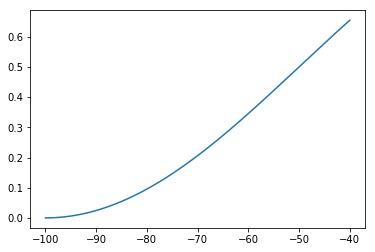

In [109]:
plt.plot(x, cos_term)

In [110]:
-20. * l0_mu

-100.0

In [113]:
8.9 * l0_mu

44.5

In [ ]:
density = density(ele) * iff(x > 0., 1., iff(x > -20. * l0, cos_term, 0.) )

In [46]:
density = iff((abs(y) > 8.9 * l0) or (abs(z) > 8.9 * l0), 0., density(ele))

SyntaxError: invalid syntax (<ipython-input-46-477e4af48db1>, line 2)

In [ ]:
# time